# 数据集加载

In [1]:
import tensorflow as tf

In [2]:
# 加载IMDB数据集，数据采用数字编码，一个数字代表一个单词
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)
print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


In [3]:
# 设置最多只读影评前500个单词
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500, value = 0) # 0.0代表通过<PAD>填充
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500, value = 0) 

# 模型搭建与训练

In [4]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

# max_words = 10000 # 所有文本只考虑出现频率最多的 10000 个单词。
model = Sequential()
model.add(Embedding(10000, 15, input_length=500))
model.add(Dropout(0.50))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(Dropout(0.50))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.50))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 15)           150000    
                                                                 
 dropout (Dropout)           (None, 500, 15)           0         
                                                                 
 conv1d (Conv1D)             (None, 500, 32)           992       
                                                                 
 dropout_1 (Dropout)         (None, 500, 32)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 250, 32)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8000)              0         
                                                        

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [6]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 12s 72ms/step - loss: 0.6922 - acc: 0.5210 - val_loss: 0.6845 - val_acc: 0.6052
Epoch 2/5
157/157 [==============================] - 11s 71ms/step - loss: 0.5277 - acc: 0.7459 - val_loss: 0.3546 - val_acc: 0.8662
Epoch 3/5
157/157 [==============================] - 12s 78ms/step - loss: 0.2972 - acc: 0.8768 - val_loss: 0.2876 - val_acc: 0.8864
Epoch 4/5
157/157 [==============================] - 12s 80ms/step - loss: 0.2285 - acc: 0.9080 - val_loss: 0.2696 - val_acc: 0.8900
Epoch 5/5
157/157 [==============================] - 12s 77ms/step - loss: 0.1986 - acc: 0.9208 - val_loss: 0.2641 - val_acc: 0.8930


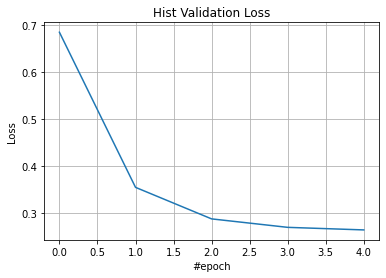

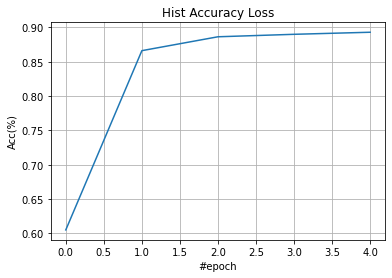

In [7]:
import matplotlib.pyplot as plt

# Validation loss
plt.plot(history.history['val_loss'])
plt.title('Hist Validation Loss')
plt.ylabel('Loss')
plt.xlabel('#epoch')
plt.grid()
plt.show()

# Accuracy
plt.plot(history.history['val_acc'])
plt.title('Hist Accuracy Loss')
plt.ylabel('Acc(%)')
plt.xlabel('#epoch')
plt.grid()
plt.show()

In [8]:
test_results = model.evaluate(x_test, y_test, verbose=False)
print(f'测试结果\n损失：{test_results[0]}；\n正确率：{100*test_results[1]}%')

测试结果
损失：0.27731624245643616；
正确率：88.35600018501282%


# 测试

获取数字与单词之间的映射

In [9]:
import numpy as np
# Obtain 3 texts
for i in np.random.randint(0, len(x_train), 3):
    INDEX_FROM=3   # word index offset
    # 读取映射字典
    word_to_id = tf.keras.datasets.imdb.get_word_index()
    # 添加offset
    word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
    word_to_id["<PAD>"] = 0
    word_to_id["<START>"] = 1
    word_to_id["<UNK>"] = 2
    word_to_id["<UNUSED>"] = 3
    # 反向映射
    id_to_word = {value:key for key,value in word_to_id.items()}


从测试集选一个文本做测试

In [10]:
# 选择一个测试索引
index = 10
# 将数值数据转为文本
comment = ''
start = 500
for ind,i in enumerate(x_test[index]):
    if i == 1:
        start = ind
    if ind > start:
        comment += id_to_word[i] 
        comment += ' '
print(f'预测文本：{comment}')
print(f'标签结果：{y_test[index]}') # 0为负面 1为正面

# 进行预测
result = model.predict(np.array([x_test[index]]))
print(f'预测结果：{int(np.round(result[0][0]))}')

预测文本：inspired by hitchcock's strangers on a train concept of two men <UNK> murders in exchange for getting rid of the two people messing up their lives throw <UNK> from the train is an original and very inventive comedy take on the idea it's a credit to danny <UNK> that he both wrote and starred in this minor comedy gem br br anne <UNK> is the mother who <UNK> the film's title and it's understandable why she gets under the skin of danny <UNK> with her sharp tongue and relentlessly putting him down for any minor <UNK> billy crystal is the writer who's wife has stolen his book idea and is now being <UNK> as a great new author even appearing on the oprah show to in <UNK> he should be enjoying thus <UNK> gets the idea of <UNK> murders to rid themselves of these <UNK> factors br br of course everything and anything can happen when writer carl <UNK> lets his imagination <UNK> with <UNK> ideas for how the plot develops and it's amusing all the way through providing plenty of laughs and chuckl